# FIMO output using D. virilis

First: 
- collapse to the gene level, compare existence of TF/gene relationships

In [1]:
import pandas as pd
import gffutils
import numpy as np
from gffutils import pybedtools_integration
import pybedtools
from pybedtools.featurefuncs import gff2bed
import seaborn as sb
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

### Import gffs from fimo output and change to bed format:  
5 motif databases: dmmpmm, flyFactor, flyReg, idmmpmm, & onTheFly

In [ ]:
-10 * np.log10(.000001)

In [ ]:
#note: score is min(1000, -10*(log10(pvalue)))
#for now I'm not going to worry about trying to get the pvalue since we're just collapsing everything to gene
dmm = pybedtools.BedTool('../motif-wf/data/fimo_dvir_02-15/motif_alignments_dmmpmm2009_dvir.gff')
dmmbed = dmm.each(gff2bed, name_field='ID').saveas().to_dataframe()
dmmbed['name'] = [x.split('-')[0] for x in dmmbed.name]

In [ ]:
dmmbed = dmmbed[dmmbed.score > 60]

In [ ]:
#add column for motif_FBgn
symbolmap = pd.read_table('/data/LCDB/lcdb-references/dmel/r6-11/gtf/dmel_r6-11.SYMBOL.csv', sep=',') 
dmm_w_motiffbgn = dmmbed.merge(symbolmap, left_on='name', right_on='SYMBOL', how='left')

In [ ]:
dmm_w_motiffbgn.head()

In [ ]:
dmm_merge = dmm_w_motiffbgn[['chrom','start','end','ENSEMBL']].rename(columns={'ENSEMBL':'name'})

In [ ]:
flyfac = pybedtools.BedTool('../motif-wf/data/fimo_dvir_02-15/motif_alignments_flyFactor_dvir.gff')
ffbed = flyfac.each(gff2bed, name_field='Name').saveas().to_dataframe()
ffbed['name'] = [x.split('_')[0] for x in ffbed.name]

In [ ]:
ffbed = ffbed[ffbed.score > 60]

In [ ]:
ffbed.head()

In [ ]:
ffmerge = ffbed[['chrom','start','end','name']]

In [ ]:
flyreg = pybedtools.BedTool('../motif-wf/data/fimo_dvir_02-15/motif_alignments_flyReg_dvir.gff')
frbed = flyreg.each(gff2bed, name_field='Name').saveas().to_dataframe()
frbed['name'] = [x.split('_')[0] for x in frbed.name]

In [ ]:
frbed = frbed[frbed.score > 60]

In [ ]:
#add column for motif_FBgn
fr_w_motiffbgn = frbed.merge(symbolmap, left_on='name', right_on='SYMBOL', how='left')

In [ ]:
fr_w_motiffbgn.head()

In [ ]:
fr_merge = fr_w_motiffbgn[['chrom','start','end','ENSEMBL']].rename(columns={'ENSEMBL':'name'})

In [ ]:
idm = pybedtools.BedTool('../motif-wf/data/fimo_dvir_02-15/motif_alignments_idmmpmm2009_dvir.gff')
idmbed = idm.each(gff2bed, name_field='Name').saveas().to_dataframe()
idmbed['name'] = [x.split('_')[0] for x in idmbed.name]

In [ ]:
idmbed = idmbed[idmbed.score > 60]

In [ ]:
idm_w_motiffbgn = idmbed.merge(symbolmap, left_on='name', right_on='SYMBOL', how='left')

In [ ]:
idm_w_motiffbgn.head()

In [ ]:
idm_merge = idm_w_motiffbgn[['chrom','start','end','ENSEMBL']].rename(columns={'ENSEMBL':'name'})

In [ ]:
onthefly = pybedtools.BedTool('../motif-wf/data/fimo_dvir_02-15/motif_alignments_onTheFly_dvir.gff')


In [ ]:
alt_otf = onthefly.each(gff2bed, name_field='Name').saveas().to_dataframe()
alt_otf['name'] = [x.split('_')[0] for x in alt_otf.name]

In [ ]:
alt_otf = alt_otf[alt_otf.score > 60]

In [ ]:
alt_otf.head()

In [ ]:
#add column for motif_FBGN
otfmap = pd.read_table('../motif-wf/data/onTheFlyMap.tsv')
y = otfmap[['name', 'FBgn']]
alt_otf_w_fbgn = alt_otf.merge(y, on='name', how='left')


In [ ]:
alt_otf_w_fbgn[alt_otf_w_fbgn.FBgn.isnull()].name.unique()

In [ ]:
#a mystery OTF... no known information about what FBgn
otfbed = alt_otf_w_fbgn[alt_otf_w_fbgn.name != 'OTF0415.1']

In [ ]:
otf_merge = otfbed[['chrom','start','end','FBgn']].rename(columns={'FBgn':'name'})

### Combine datasets
Target gene intersect, make binary, drop duplicates

In [ ]:
alldatasets = pd.concat([dmm_merge, ffmerge, fr_merge, idm_merge, otf_merge])

In [ ]:
#alldatasets.to_csv('../output/motif/dvir_fimo_alldata.bed', sep='\t', index=False)

In [ ]:
#start here next time and import alldatasets

In [2]:
alldatasets = pd.read_table('../output/motif/dvir_fimo_alldata.bed')

In [3]:
# make dictionary of alt fbgns

fbgn = {}
with open('/data/LCDB/lcdb-references/dmel/r6-16/fb_annotation/dmel_r6-16.fb_annotation') as f:
    next(f)
    for line in f:
        split = line.split('\t')
        first = split[1]
        seconds = split[2].split(',')
        fbgn[first] = first
        for x in seconds:
            if x:
                fbgn[x] = first
        

In [4]:
alldatasets = alldatasets[~alldatasets.name.isnull()]
alldatasets['update'] = alldatasets.name.map(lambda x: fbgn[x])
alldatasets.head()

,chrom,start,end,name,update
0,scaffold_13049,2474183,2474194,FBgn0260632,FBgn0260632
1,scaffold_13049,5600030,5600041,FBgn0260632,FBgn0260632
2,scaffold_13049,11620732,11620743,FBgn0260632,FBgn0260632
3,scaffold_13049,11787376,11787387,FBgn0260632,FBgn0260632
4,scaffold_13049,18927385,18927396,FBgn0260632,FBgn0260632


In [5]:
updated_alldatasets = alldatasets[['chrom','start','end','update']]

In [6]:
#target gene intersect

In [7]:
genegtf = pybedtools.BedTool('/data/Oliverlab/data/annotation/dvir.v3.gtf')
gene_info = genegtf.each(gff2bed, name_field='gene_id').saveas()

In [8]:
targene_intersect = gene_info.intersect(pybedtools.BedTool.from_dataframe(updated_alldatasets), 
                            wb=True).saveas().to_dataframe()[['name','thickStart','thickEnd','itemRgb','blockCount']]

In [9]:
targene_intersect.columns = ['target_gene','chrom','start','end','motif_fbgn']
targene_intersect.head()

,target_gene,chrom,start,end,motif_fbgn
0,DvirG_000005,scaffold_10051,268,283,FBgn0005694
1,DvirG_000005,scaffold_10051,316,331,FBgn0005694
2,DvirG_000005,scaffold_10051,364,379,FBgn0005694
3,DvirG_000005,scaffold_10051,244,259,FBgn0005694
4,DvirG_000005,scaffold_10051,412,427,FBgn0005694


In [10]:
collapse = targene_intersect[['target_gene', 'motif_fbgn']].drop_duplicates()

In [11]:
#switch to flybase annotation
refmap = pd.read_table('../output/annotation/gffcmp.dvir.v3.gtf.refmap')
refmap['gene_fbgn'] = [x.split('|')[0] for x in refmap.qry_id_list]
genemap = refmap[['ref_gene_id','class_code','gene_fbgn']]

In [12]:
completematch = genemap[genemap.class_code == '='][['ref_gene_id','gene_fbgn']]
completematch.drop_duplicates(inplace=True)
completematch.head()

,ref_gene_id,gene_fbgn
0,FBgn0256559,DvirG_000001
1,FBgn0282270,DvirG_000002
2,FBgn0282538,DvirG_000003
3,FBgn0256560,DvirG_000004
4,FBgn0282609,DvirG_000005


In [13]:
merge_1 = collapse.merge(completematch, left_on='target_gene', right_on='gene_fbgn', how='inner')[['motif_fbgn',
                                                                            'ref_gene_id','gene_fbgn']]
merge_1 = merge_1.rename(columns={'ref_gene_id':'target_gene'})

In [14]:
#import orthologs
dvirorthologs = pd.read_table('/data/Oliverlab/data/orthologs/flyBase_orthoDB_one2one/dvir.concise.one2one',
                             header=None, names=['Dmel','Symbol','Dvir'])
dvirorthologs.head()

,Dmel,Symbol,Dvir
0,FBgn0025571,SF1,FBgn0283420
1,FBgn0085468,ND-MWFE,FBgn0283412
2,FBgn0001253,ImpE1,FBgn0283406
3,FBgn0050022,CG30022,FBgn0283403
4,FBgn0037365,CG2104,FBgn0283394


In [15]:
merge_2 = merge_1.merge(dvirorthologs, left_on='target_gene', right_on='Dvir', how='inner')
ortholog_target_genes = merge_2[['motif_fbgn','Dmel']].rename(columns={'Dmel':'target_gene'})
ortholog_target_genes['binary'] = 1

## Compare to motifs we have in Dmel

In [16]:
all_dmel = pd.read_table('../output/motif/alldatabases.bed', header=None, 
              names=['chrom', 'start','end','motif_symbol','pval','strand','motif_FBgn'])

In [17]:
all_dmel = all_dmel[all_dmel.pval < .000001]

In [18]:
all_dmel.to_csv('../output/motif/alldata_filtered_dmel.bed', header=None, index=False, sep='\t')

In [19]:
all_dmel = all_dmel[['chrom','start','end','motif_FBgn']]

In [20]:
gene_info = pybedtools.BedTool('../output/chip/dmel6.12.genes.bed')
targene_2 = gene_info.intersect(pybedtools.BedTool.from_dataframe(all_dmel), 
                wb=True).saveas().to_dataframe()[['name','thickStart','thickEnd','itemRgb','blockCount']]
targene_2.columns = ['target_gene','chrom','start','end','motif_fbgn']

In [21]:
dmelcollapse = targene_2[['target_gene', 'motif_fbgn']].drop_duplicates()

In [22]:
#only consider orthologs
merge_ortho_2 = dmelcollapse.merge(dvirorthologs, left_on='target_gene', right_on='Dmel', 
                                            how='inner')

In [23]:
ortho_dmel2 = merge_ortho_2[['target_gene','motif_fbgn']]
ortho_dmel2['binary'] = 1 

/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
#inner merge by motif
merged = []
not_merged = []

for name, group in ortholog_target_genes.groupby('motif_fbgn'):
    dmel = ortho_dmel2[ortho_dmel2.motif_fbgn == name]
    dvir = ortholog_target_genes[ortholog_target_genes.motif_fbgn == name]
    try:
        merge = dmel.merge(dvir, how='inner')
        merged.append(merge)
    except:
        not_merged.append(name)

In [25]:
innermerge2 = pd.concat(merged)
innermerge2.drop_duplicates(inplace=True)

In [26]:
#get count information first

In [27]:
targene_intersect.drop_duplicates(inplace=True)
targene_intersect['binary'] = 1
vircounts = targene_intersect.groupby(['motif_fbgn','target_gene']).agg({'binary':'count'}).reset_index()

In [28]:
fba_vircount = vircounts.merge(completematch, left_on='target_gene', right_on='gene_fbgn', how='inner')[['motif_fbgn',
                                    'ref_gene_id','binary']].rename(columns={'ref_gene_id':'target_gene'})

In [29]:
vir_worthologs = fba_vircount.merge(dvirorthologs, left_on='target_gene', right_on='Dvir', how='inner')[['motif_fbgn',
                                                                                'Dvir','Dmel','binary']]
vir_worthologs['dmel_count'] = 0
vir_worthologs['dvir_count'] = vir_worthologs['binary']

In [30]:
#melanogaster: 

In [31]:
targene_2.drop_duplicates(inplace=True)
targene_2['binary'] = 1 
melcounts = targene_2.groupby(['motif_fbgn','target_gene']).agg({'binary':'count'}).reset_index()

In [32]:
mel_worthologs = melcounts.merge(dvirorthologs, left_on='target_gene', right_on='Dmel', how='inner')[['motif_fbgn',
                                                                                'Dvir','Dmel','binary']]
mel_worthologs['dmel_count'] = mel_worthologs['binary']
mel_worthologs['dvir_count'] = 0

In [33]:
vir_worthologs.drop('binary', axis=1, inplace=True)
mel_worthologs.drop('binary', axis=1, inplace=True)

In [34]:
vir_worthologs.head()

,motif_fbgn,Dvir,Dmel,dmel_count,dvir_count
0,FBgn0000028,FBgn0203279,FBgn0027111,0,1
1,FBgn0000606,FBgn0203279,FBgn0027111,0,1
2,FBgn0003396,FBgn0203279,FBgn0027111,0,1
3,FBgn0010768,FBgn0203279,FBgn0027111,0,2
4,FBgn0013263,FBgn0203279,FBgn0027111,0,10


In [35]:
together = pd.concat([vir_worthologs, mel_worthologs])

In [36]:
together.drop_duplicates(inplace=True)

In [37]:
together[(together.motif_fbgn == 'FBgn0000028') & (together.Dvir == 'FBgn0062716')]

,motif_fbgn,Dvir,Dmel,dmel_count,dvir_count
15669,FBgn0000028,FBgn0062716,FBgn0020299,0,2
4035,FBgn0000028,FBgn0062716,FBgn0020299,1,0


In [38]:
sumattempt = together.groupby(['motif_fbgn','Dvir','Dmel'])[['dmel_count','dvir_count']].sum()

In [39]:
sumattempt.reset_index(inplace=True)

In [40]:
sumattempt[(sumattempt.motif_fbgn == 'FBgn0000028') & (sumattempt.Dvir == 'FBgn0062716')]

,motif_fbgn,Dvir,Dmel,dmel_count,dvir_count
19,FBgn0000028,FBgn0062716,FBgn0020299,1,2


In [41]:
sumattempt['target_gene'] = sumattempt.Dvir + ':' + sumattempt.Dmel

In [42]:
table_ = sumattempt[['motif_fbgn','target_gene','dmel_count','dvir_count']]

In [43]:
table_.head()

,motif_fbgn,target_gene,dmel_count,dvir_count
0,FBgn0000028,FBgn0013066:FBgn0260642,0,2
1,FBgn0000028,FBgn0013078:FBgn0000715,0,1
2,FBgn0000028,FBgn0013098:FBgn0262473,1,0
3,FBgn0000028,FBgn0013100:FBgn0003944,0,1
4,FBgn0000028,FBgn0013109:FBgn0000490,0,1


In [44]:
both_table = table_[(table_.dmel_count != 0) & (table_.dvir_count != 0)]

In [45]:
both_table.shape

(28671, 4)

In [46]:
table_.shape 

(155640, 4)

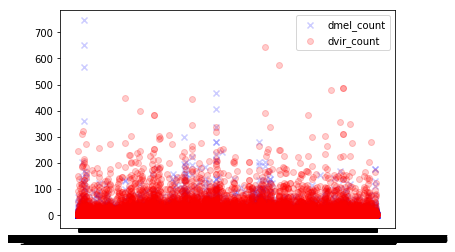

In [59]:
plt.scatter(both_table.target_gene, both_table.dmel_count, c='b', alpha=0.2, marker='x')
plt.scatter(both_table.target_gene, both_table.dvir_count, c='r', alpha=0.2, marker='o')
plt.legend()
plt.show()

In [48]:
table_['mean_count'] = table_.mean(axis=1, numeric_only=True)

/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
table_['difference'] = table_.dmel_count - table_.dvir_count

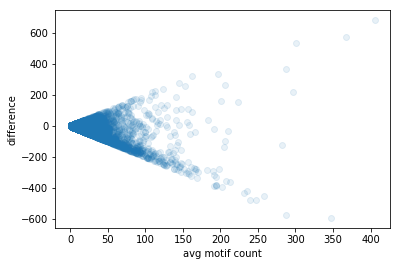

In [50]:
plt.scatter(table_.mean_count, table_.difference, alpha=0.1)
plt.xlabel('avg motif count')
plt.ylabel('difference')
plt.show()

/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


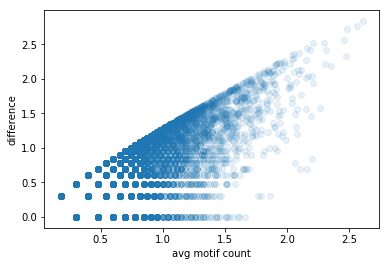

In [51]:
plt.scatter(np.log10(table_.mean_count + 1), np.log10(table_.difference + 1), alpha=0.1)
plt.xlabel('avg motif count')
plt.ylabel('difference')
plt.show()

In [52]:
both_table = table_[(table_.dmel_count != 0) & (table_.dvir_count != 0)]

/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


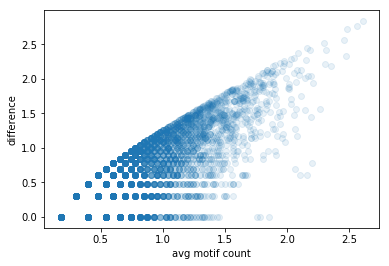

In [53]:
plt.scatter(np.log10(both_table.mean_count), np.log10(both_table.difference), alpha=0.1)
plt.xlabel('avg motif count')
plt.ylabel('difference')
plt.show()

In [54]:
table_[abs(table_.difference) > 500]

,motif_fbgn,target_gene,dmel_count,dvir_count,mean_count,difference
51424,FBgn0005694,FBgn0206272:FBgn0267033,51,643,347.0,-592
51607,FBgn0005694,FBgn0206990:FBgn0261804,2,574,288.0,-572
71603,FBgn0020309,FBgn0066145:FBgn0028369,567,35,301.0,532
78401,FBgn0027339,FBgn0066145:FBgn0028369,653,82,367.5,571
139360,FBgn0265276,FBgn0066145:FBgn0028369,746,66,406.0,680


In [55]:
#sanity checK: 

In [56]:
table_[table_.motif_fbgn == 'FBgn0038787']

,motif_fbgn,target_gene,dmel_count,dvir_count,mean_count,difference
107218,FBgn0038787,FBgn0013066:FBgn0260642,5,149,77.0,-144
107219,FBgn0038787,FBgn0013071:FBgn0000358,0,1,0.5,-1
107220,FBgn0038787,FBgn0013078:FBgn0000715,0,8,4.0,-8
107221,FBgn0038787,FBgn0013080:FBgn0001112,0,3,1.5,-3
107222,FBgn0038787,FBgn0013081:FBgn0001128,0,2,1.0,-2
107223,FBgn0038787,FBgn0013088:FBgn0002772,0,6,3.0,-6
107224,FBgn0038787,FBgn0013092:FBgn0003250,1,3,2.0,-2
107225,FBgn0038787,FBgn0013093:FBgn0262955,0,1,0.5,-1
107226,FBgn0038787,FBgn0013098:FBgn0262473,10,36,23.0,-26
107227,FBgn0038787,FBgn0013100:FBgn0003944,6,80,43.0,-74


In [57]:
targene_intersect[(targene_intersect.motif_fbgn == 'FBgn0038787') & (targene_intersect.target_gene == 'DvirG_009984')].sort_values('start')

,target_gene,chrom,start,end,motif_fbgn,binary
2000995,DvirG_009984,scaffold_13047,5871770,5871785,FBgn0038787,1
2000991,DvirG_009984,scaffold_13047,5872999,5873014,FBgn0038787,1
2000985,DvirG_009984,scaffold_13047,5873002,5873017,FBgn0038787,1
2000986,DvirG_009984,scaffold_13047,5873005,5873020,FBgn0038787,1
2000993,DvirG_009984,scaffold_13047,5873008,5873023,FBgn0038787,1
2000996,DvirG_009984,scaffold_13047,5873011,5873026,FBgn0038787,1
2000992,DvirG_009984,scaffold_13047,5877709,5877724,FBgn0038787,1
2000994,DvirG_009984,scaffold_13047,5877847,5877862,FBgn0038787,1
2000989,DvirG_009984,scaffold_13047,5877850,5877865,FBgn0038787,1
2000987,DvirG_009984,scaffold_13047,5877853,5877868,FBgn0038787,1


In [58]:
completematch[completematch.ref_gene_id == 'FBgn0013066']

,ref_gene_id,gene_fbgn
16126,FBgn0013066,DvirG_009984
